In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = fetch_ucirepo(id=477).data.original
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.rename(columns={"No":"Id","X1 transaction date":"Transaction date","X2 house age":"House age","X3 distance to the nearest MRT station":"Distance in meters to the nearest MRT station","X4 number of convenience stores":"Number of convenience stores","X5 latitude":"Latitue","X6 longitude":"Longitude","Y house price of unit area":"House price of unit area"},inplace=True)
df

,Id,Transaction date,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
def format_date(x):
    year,month = map(int,str(round(x,1)).replace('.','/').split('/'))

    month_dict = {
        0: "January",
        1: "February",
        2: "March",
        3: "April",
        4: "May",
        5: "June",
        6: "July",
        7: "August",
        8: "September",
        9: "October",
        10: "November",
        11: "December"
    }
    year = str(year)

    month_name = month_dict.get(month, "Invalid Month")
    result = month_name+'/'+year
    return result



df['Transaction date']=df['Transaction date'].apply(lambda x: format_date(x))
df['Transaction date']

0        October/2012
1        October/2012
2           July/2013
3           June/2013
4      September/2012
            ...      
409      January/2013
410       August/2012
411        March/2013
412      January/2013
413         June/2013
Name: Transaction date, Length: 414, dtype: object

In [5]:
df

,Id,Transaction date,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
0,1,October/2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,October/2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,July/2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,June/2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,September/2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,January/2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,August/2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,March/2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,January/2013,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
df.isnull().sum()

Id                                               0
Transaction date                                 0
House age                                        0
Distance in meters to the nearest MRT station    0
Number of convenience stores                     0
Latitue                                          0
Longitude                                        0
House price of unit area                         0
dtype: int64

In [7]:
df.describe()

,Id,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
df.iloc[:,1:8]

,Transaction date,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
0,October/2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,October/2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,July/2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,June/2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,September/2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,January/2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,August/2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,March/2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,January/2013,8.1,104.81010,5,24.96674,121.54067,52.5


Text(0.5, 1.0, 'House price of unit area by relation between Distance to the nearest MRT station')

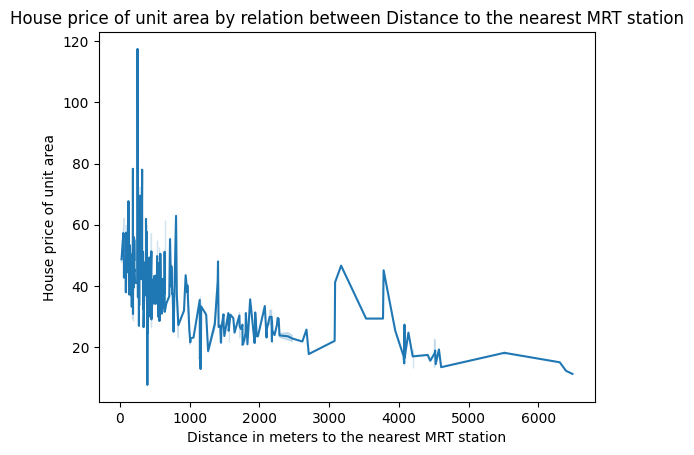

In [9]:
sns.lineplot(data=df.iloc[:,1:8],y=df['House price of unit area'],x=df['Distance in meters to the nearest MRT station'])
plt.title('House price of unit area by relation between Distance to the nearest MRT station')

Text(0.5, 1.0, 'House price of unit area by number of convenience stores')

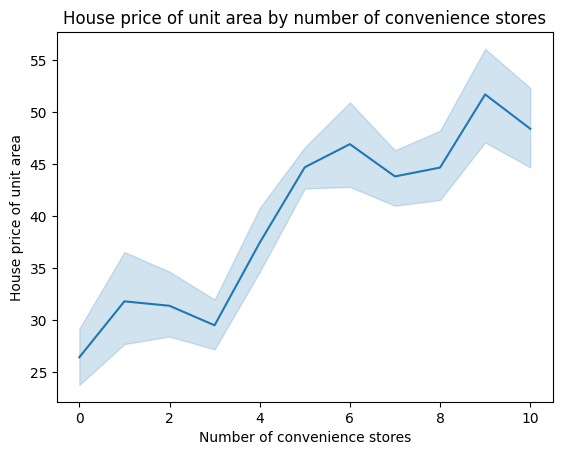

In [10]:
sns.lineplot(data=df.iloc[:,1:8],y='House price of unit area',x='Number of convenience stores')
plt.title('House price of unit area by number of convenience stores')

In [11]:
center_latitue = df['Latitue'].mean()
center_longitude = df['Longitude'].mean()
print(center_latitue,center_longitude)

24.969030072463767 121.53336108695655


In [12]:
df_treatmented = df[[
        'House age',
        'Distance in meters to the nearest MRT station',
        'Number of convenience stores', 
        'Latitue', 
        'Longitude',
        'House price of unit area']]

In [13]:
df_treatmented['Distance from center'] = np.sqrt((df['Latitue']-center_latitue)**2+(df['Longitude']-center_longitude)**2)
df_treatmented_copy = df_treatmented.drop(columns='House price of unit area')
df_treatmented_copy['House price of unit area'] = df_treatmented['House price of unit area']
df_treatmented = df_treatmented_copy

C:\Users\mbern\AppData\Local\Temp\ipykernel_18596\628643251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treatmented['Distance from center'] = np.sqrt((df['Latitue']-center_latitue)**2+(df['Longitude']-center_longitude)**2)


In [14]:
df_treatmented

,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,Distance from center,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,0.015554,37.9
1,19.5,306.59470,9,24.98034,121.53951,0.012873,42.2
2,13.3,561.98450,5,24.98746,121.54391,0.021235,47.3
3,13.3,561.98450,5,24.98746,121.54391,0.021235,54.8
4,5.0,390.56840,5,24.97937,121.54245,0.013767,43.1
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,0.040354,15.4
410,5.6,90.45606,9,24.97433,121.54310,0.011088,50.0
411,18.8,390.96960,7,24.97923,121.53986,0.012094,40.6
412,8.1,104.81010,5,24.96674,121.54067,0.007659,52.5


In [15]:
df_treatmented.corr()

,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,Distance from center,House price of unit area
House age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.025940,-0.210567
Distance in meters to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,0.928831,-0.673613
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,-0.473598,0.571005
Latitue,0.054420,-0.591067,0.444143,1.000000,0.412924,-0.505831,0.546307
Longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,-0.641841,0.523287
Distance from center,-0.025940,0.928831,-0.473598,-0.505831,-0.641841,1.000000,-0.578110
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,-0.578110,1.000000


Text(0.5, 1.0, 'Heat map by correlation between the variables')

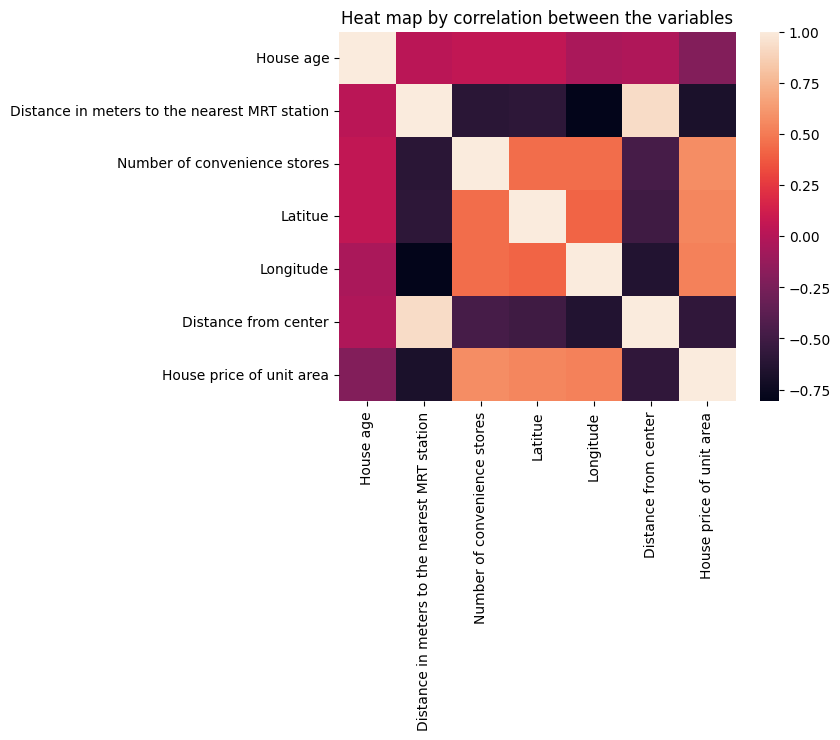

In [16]:
sns.heatmap(df_treatmented.corr())
plt.title('Heat map by correlation between the variables')

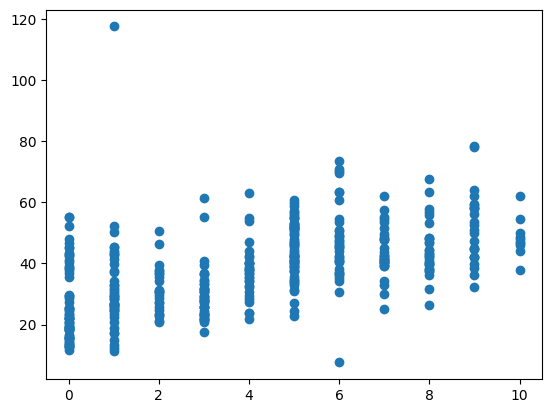

In [17]:
plt.scatter(x=df_treatmented['Number of convenience stores'],y=df_treatmented['House price of unit area'])
plt.show()

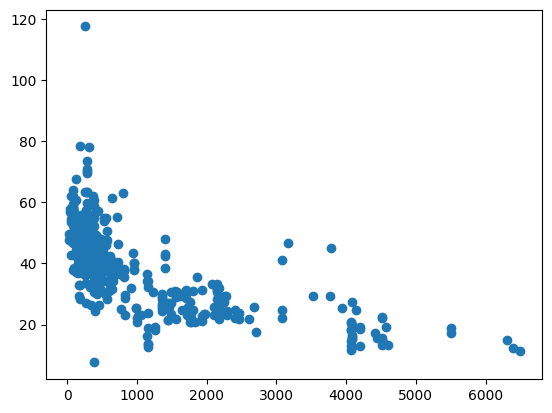

In [18]:
plt.scatter(x=df_treatmented['Distance in meters to the nearest MRT station'],y=df_treatmented['House price of unit area'])
plt.show()

Preprocessing Data, it'll be created two diferents dataset to test the regression algoritms

In [19]:
df_treatmented
x = df_treatmented.iloc[:,0:6].values
y = df_treatmented.iloc[:,6:7].values
df_treatmented.columns

Index(['House age', 'Distance in meters to the nearest MRT station',
       'Number of convenience stores', 'Latitue', 'Longitude',
       'Distance from center', 'House price of unit area'],
      dtype='object')

In [20]:
standard = StandardScaler()
df_treatmented_standard = df_treatmented
df_treatmented_standard[[
    'House age', 
    'Distance in meters to the nearest MRT station',
    'Number of convenience stores', 
    'Latitue', 
    'Longitude',
    'Distance from center']] = standard.fit_transform(df_treatmented_standard[[
        'House age', 
        'Distance in meters to the nearest MRT station',
        'Number of convenience stores', 
        'Latitue', 
        'Longitude',
        'Distance from center']])
x_standard = df_treatmented_standard.iloc[:,0:6].values
y_standard = df_treatmented_standard.iloc[:,6:7].values

I'll add a part to create a polinomial algortims too

In [21]:
x_poly= x
y_poly = y
x_poly_standard = x_standard
y_poly_standard = y_standard

It'll be created two kind of variable to training the algoritms: one without a standarization and another with it.

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)
x_train_standard,x_test_standard,y_train_standard,y_test_standard = train_test_split(x_standard,y_standard,random_state=0,test_size=0.2)

Simple Linear LinearRegression

In [23]:
linear_model = LinearRegression()
model_linear = linear_model.fit(x_train,y_train)
print(model_linear.coef_,model_linear.intercept_)

[[-2.65027436e-01 -4.13804060e-03  1.13230454e+00  2.39963772e+02
  -1.07273699e+00 -7.06069221e-01]] [-5818.65939695]


In [24]:
model_linear_standard = linear_model.fit(x_train_standard,y_train_standard)
print(model_linear_standard.coef_,model_linear_standard.intercept_)

[[-3.01567223 -5.21634937  3.33124245  2.9743988  -0.0164436  -0.00729845]] [38.07446623]


Let's check the score of each models with a standarization and withou, make a predict and see the mean absolute error and mean squarer error

In [25]:
print(model_linear.score(x_train,y_train),model_linear.score(x_test,y_test))

-404629.60013128235 -406865.80819855223


In [26]:
predict = model_linear.predict(x_test)
mean_absolute_error(y_test,predict),mean_squared_error(y_test,predict)

(np.float64(5158.086398430646), np.float64(70672362.97365221))

In [27]:
print(model_linear_standard.score(x_train_standard,y_train_standard),model_linear_standard.score(x_test_standard,y_test_standard))

0.5544852888428246 0.6420332992942648


In [28]:
predict_standard = model_linear_standard.predict(x_test_standard)
mean_absolute_error(y_test_standard,predict_standard),mean_squared_error(y_test_standard,predict_standard)

(np.float64(5.746249536612746), np.float64(62.17846257050974))

Let's try a polinomial model

In [29]:
poli = PolynomialFeatures(degree=2)
poli_linear = LinearRegression()
x_poly = poli.fit_transform(x_poly)
x_poly_standard = poli.fit_transform(x_poly_standard)

x_train_poly,x_test_poly,y_train_poly,y_test_poly = train_test_split(x_poly,y_poly,random_state=0,test_size=0.2)
x_train_standard_poly,x_test_standard_poly,y_train_standard_poly,y_test_standard_poly = train_test_split(x_poly_standard,y_poly_standard,random_state=0,test_size=0.2)

In [30]:
model_poli = poli_linear.fit(x_train_poly,y_train_poly)
model_poli_standard = poli_linear.fit(x_train_standard_poly,y_train_standard_poly)

In [31]:
print(model_poli.score(x_train_poly,y_train_poly),model_poli.score(x_test_poly,y_test_poly))

-9460541587225.27 -11624929309171.62


In [32]:
print(model_poli_standard.score(x_train_standard_poly,y_train_standard_poly),model_poli_standard.score(x_test_standard_poly,y_test_standard_poly))

0.6468871768630897 0.570034618923847


In [33]:
predict_poly = model_poli.predict(x_test_poly)
predict_poly_standard = model_poli_standard.predict(x_test_standard_poly)

In [34]:
mean_absolute_error(y_test_poly,predict_poly),mean_squared_error(y_test_poly,predict_poly)

(np.float64(15927537.375677712), np.float64(2019238746258139.2))

In [35]:
mean_absolute_error(y_test_standard_poly,predict_poly_standard),mean_squared_error(y_test_standard_poly,predict_poly_standard)

(np.float64(6.374341114457831), np.float64(74.68456228233245))

Now let's try user a Random Forest to make the regression

In [36]:
randomForest = RandomForestRegressor(n_estimators=60,criterion='squared_error',random_state=0,)
forest_model_regression = randomForest.fit(x_train,y_train.ravel())
forest_model_regression_standard = randomForest.fit(x_train_standard,y_train_standard.ravel())

In [37]:
print(forest_model_regression.score(x_train,y_train.ravel()),forest_model_regression.score(x_test,y_test.ravel()))

-0.08281229617245467 -0.08081546310606491


In [38]:
predict_forest = forest_model_regression_standard.predict(x_test)
predict_forest_standard = forest_model_regression_standard.predict(x_test_standard)

In [39]:
print(forest_model_regression_standard.score(x_train_standard,y_train_standard.ravel()),forest_model_regression_standard.score(x_test_standard,y_test_standard.ravel()))

0.9520112687173167 0.6902661993125552


In [40]:
print(mean_absolute_error(y_test,predict_forest),mean_squared_error(y_test,predict_forest))

11.422063253012045 187.73657908927368


In [41]:
print(mean_absolute_error(y_test_standard,predict_forest_standard),mean_squared_error(y_test_standard,predict_forest_standard))

5.076647207879135 53.80045544710483


Now let's try decision tree to make regression

In [42]:
decisionTree = DecisionTreeRegressor(criterion='squared_error')
tree_model = decisionTree.fit(x_train,y_train)
tree_model_standard = decisionTree.fit(x_train_standard,y_train_standard)

In [43]:
predic_tree =tree_model.predict(x_test)
predic_tree_standard = tree_model_standard.predict(x_test_standard)

In [44]:
print(tree_model.score(x_train,y_train),tree_model.score(x_test,y_test))

-1.1180187920856102 -1.2096226723354468


In [45]:
print(tree_model_standard.score(x_train_standard,y_train_standard),tree_model_standard.score(x_test_standard,y_test_standard))

0.989063944028367 0.22975975241451274


In [46]:
print(mean_absolute_error(y_test,predic_tree),mean_squared_error(y_test,predic_tree))

16.18433734939759 383.8092771084338


In [47]:
print(mean_absolute_error(y_test_standard,predic_tree_standard),mean_squared_error(y_test_standard,predic_tree_standard))

6.842871485943773 133.78997071619813


Let's try now a Neural Network to make the Regression

In [48]:
neural_network_regression = MLPRegressor(hidden_layer_sizes=29,tol=0.0001,activation='relu',solver='adam',max_iter=120,random_state=0)
model_neural_network = neural_network_regression.fit(x_train,y_train.ravel())
model_neural_network_standard = neural_network_regression.fit(x_train_standard,y_train_standard.ravel())

c:\Users\mbern\OneDrive\project Real State Evaluation\Real-Estate-Valuation\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mbern\OneDrive\project Real State Evaluation\Real-Estate-Valuation\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
print(model_neural_network.score(x_train,y_train.ravel()),model_neural_network.score(x_test,y_test.ravel()))

-4648.953365668787 -4714.680355755623


Because of the neural network have had a low score, I won't go continue with it

Now I gonna optimizer the algoritms

In [50]:
randomFlorest_Search = {
    'n_estimators':[30,45,60,70],
    'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
    'random_state':[0,1],
    'bootstrap':[True,False]
}
decisionTree_Search = {
    'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
    'splitter':['best','random']
}

model_forest = RandomForestRegressor()
model_tree = DecisionTreeRegressor()

gridForest = GridSearchCV(estimator=model_forest,param_grid=randomFlorest_Search,cv=5,verbose=1)
gridTree = GridSearchCV(estimator=model_tree,param_grid=decisionTree_Search,cv=5,verbose=1)



In [51]:
gridForest.fit(x_train_standard,y_train_standard)
gridTree.fit(x_train_standard,y_train_standard)

c:\Users\mbern\OneDrive\project Real State Evaluation\Real-Estate-Valuation\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\Users\mbern\OneDrive\project Real State Evaluation\Real-Estate-Valuation\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mbern\OneDrive\project Real State Evaluation\Real-Estate-Valuation\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mbern\OneDrive\project Real State Evaluation\Real-Estate-Valuation\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mbern\OneDrive\p

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [52]:
print(gridForest.best_params_,gridTree.best_params_)

{'bootstrap': True, 'criterion': 'absolute_error', 'n_estimators': 30, 'random_state': 1} {'criterion': 'squared_error', 'splitter': 'random'}


I'm gonna make just the Random Forest Regressos because the params on the Decision Tree is the same that I used.

In [53]:
randomForest_best = RandomForestRegressor(n_estimators=30,criterion='absolute_error',random_state=1,bootstrap=True)
randomForest_best.fit(x_train_standard,y_train_standard)
print(randomForest_best.score(x_train_standard,y_train_standard),randomForest_best.score(x_test_standard,y_test_standard))

c:\Users\mbern\OneDrive\project Real State Evaluation\Real-Estate-Valuation\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9284490100568509 0.7013881037001444


In [54]:
predict_best_standard = randomForest_best.predict(x_test_standard)


In [55]:
print(mean_absolute_error(y_test_standard,predict_best_standard),mean_squared_error(y_test_standard,predict_best_standard))

4.942570281124497 51.86859163319944
